In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Folder path
folder = "E:/Sales_Data"


In [3]:
df = pd.read_csv("E:/Sales_Data/Sales_April_2019.csv")

# List all files in folder
files = [file for file in os.listdir(folder) if file.endswith('.csv')]

# Empty DataFrame
twelve_months_data = pd.DataFrame()

# Loop through files and combine
for file in files:
    df = pd.read_csv(os.path.join(folder, file))   # join path + filename safely
    twelve_months_data = pd.concat([twelve_months_data, df], ignore_index=True)

# Save combined CSV
twelve_months_data.to_csv("E:/Sales_Data/twelve_months_data.csv", index=False)

In [4]:
# Read the combined CSV

all_data = pd.read_csv("E:/Sales_Data/twelve_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
### Deleting NAN rows

In [6]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()


all_data=all_data.dropna(how="all")
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"
99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001"


In [7]:
 # check if any NaN exists in the whole DataFrame

if all_data.isna().any().any():  
    print("NaN values found!")
else:
    print("No NaN values found.\n")


No NaN values found.



In [8]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
## Convert columns into correct type

In [10]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) # to int
all_data['Price Each']= pd.to_numeric(all_data['Price Each']) # to Float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
## Adding Months Column

In [12]:
all_data['Month'] =all_data['Order Date'].str[0:2]
all_data['Month'] =all_data['Month'].astype('int32')
#all_data.head(500)

In [13]:
#adding Sales column

In [14]:

all_data['Sales'] =all_data['Quantity Ordered']* all_data['Price Each']
#all_data.head()

In [15]:
##Month with higher sales


In [16]:
results = all_data.groupby("Month").sum(numeric_only=True)
#print(results.head())
#print(results['Sales'])




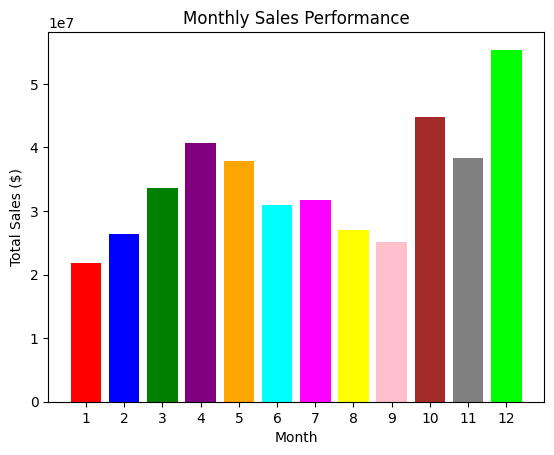

In [17]:


months = range(1, 13)
colors = ["red", "blue", "green", "purple", "orange", 
          "cyan", "magenta", "yellow", "pink", "brown", "gray", "lime"]

plt.bar(months, results['Sales'],color=colors)
plt.xticks(months)  # label x-axis with 1-12
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Performance")
#plt.show()
plt.savefig('monthly_sales.png')

In [18]:
# city with highest data


In [19]:
#Adding city column

In [20]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
##City with highest sales

In [22]:
results = all_data.groupby("City").sum(numeric_only=True)
highest_sales_city = results.sort_values('Sales', ascending=False)
print("The city with the highest sales is:\n", highest_sales_city.head())


The city with the highest sales is:
                     Quantity Ordered   Price Each    Month        Sales
City                                                                   
San Francisco (CA)            602868  98537540.88  3786240  99146446.92
Los Angeles (CA)              399468  65057222.76  2499900  65430849.60
New York City (NY)            335184  55624449.96  2108892  55971809.16
Boston (MA)                   270336  43648917.24  1693344  43939704.12
Atlanta (GA)                  199224  33358898.40  1257528  33545982.96


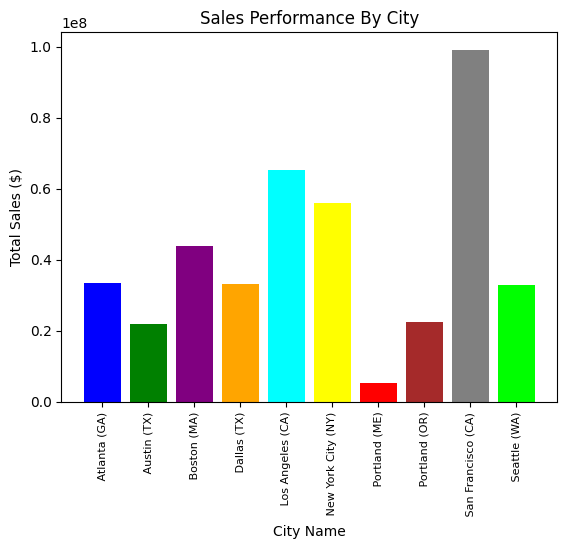

In [23]:

cities= [city for city,df in all_data.groupby('City')]
colors = [ "blue", "green", "purple", "orange", 
          "cyan", "yellow", "red", "brown", "gray", "lime"]

plt.bar(cities, results['Sales'],color=colors)
plt.xticks(cities,rotation='vertical' ,size=8)  
plt.xlabel("City Name")
plt.ylabel("Total Sales ($)")
plt.title("Sales Performance By City")
plt.show()
#plt.savefig('city_by_sales.png')

In [24]:
#Adding Hour & Minute column

In [25]:
# Replace dashes with slashes for consistency
all_data['Order Date'] = all_data['Order Date'].str.replace('-', '/', regex=False)

# Now parse with a fixed format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%d/%m/%Y %H:%M', errors='coerce')


In [27]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
#all_data.head()

In [32]:
##"Customer Purchase Behavior by Hour"

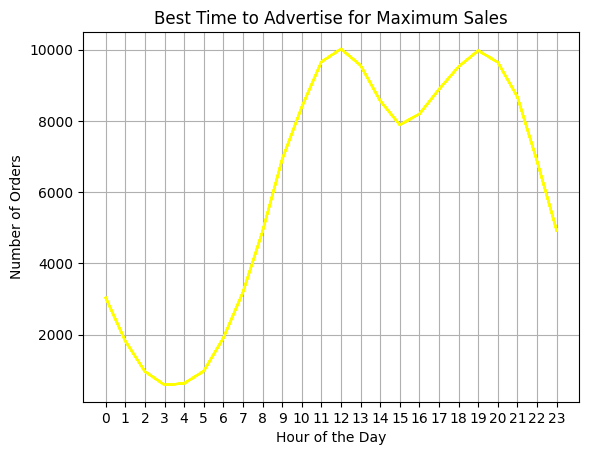

In [33]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(),color='yellow')

plt.xticks(hours)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Best Time to Advertise for Maximum Sales")
plt.grid()
plt.show()

In [34]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates so each Order ID appears once
df = df[['Order ID', 'Grouped']].drop_duplicates()

#df.head()



In [35]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    products = row.split(',')
    products = list(set(products))  #  remove duplicates from same order

    count.update(Counter(combinations(products, 2)))

#Top 10 most common pairs
for key,value in count.most_common(10):
   print(key,value)

('Lightning Charging Cable', 'iPhone') 1011
('USB-C Charging Cable', 'Google Phone') 997
('Wired Headphones', 'iPhone') 462
('Wired Headphones', 'Google Phone') 398
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 203
('Wired Headphones', 'Vareebadd Phone') 149
('Wired Headphones', 'Lightning Charging Cable') 129


In [38]:
## Top Product: Best-Selling Products

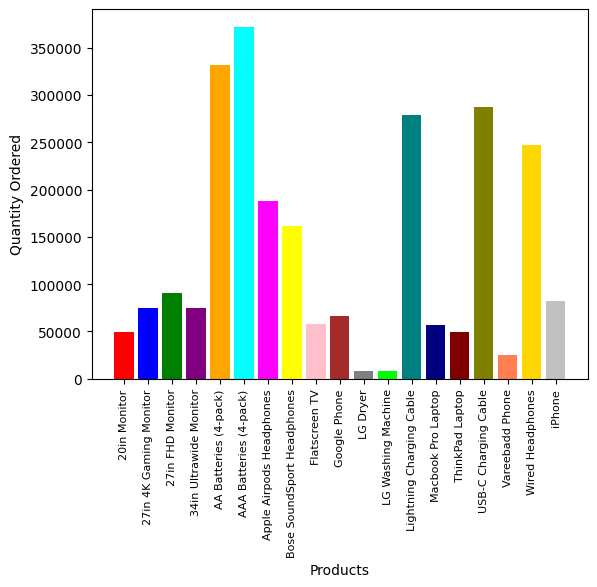

In [39]:
product_group=all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
products=[product for product,df in product_group]


colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "yellow", "pink",
          "brown", "gray", "lime", "teal", "navy", "maroon", "olive", "coral", "gold", "silver"]
plt.bar(products,quantity_ordered,color=colors)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.xticks(products,rotation='vertical' ,size=8)

plt.show()

In [40]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

all_data.dropna(subset=['Price Each'], inplace=True)
#print(all_data['Price Each'].head(100))

In [ ]:
#Objective: Compare product demand (Quantity Ordered) with their average prices to identify high-selling vs high-priced items.

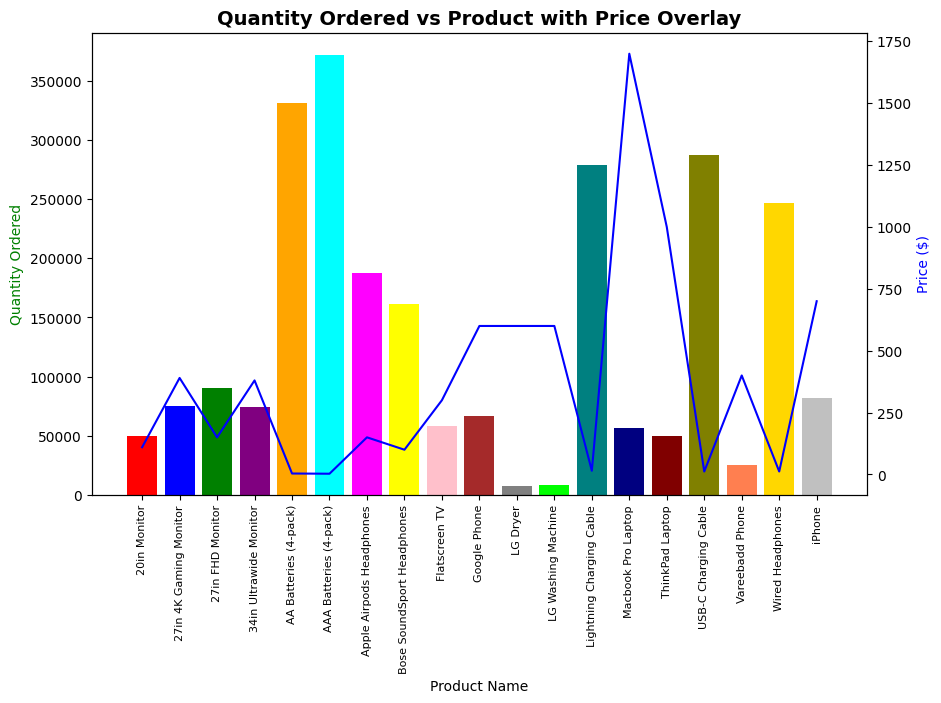

In [42]:
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots(figsize=(10, 6))
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "yellow", "pink",
          "brown", "gray", "lime", "teal", "navy", "maroon", "olive", "coral", "gold", "silver"]
ax2 = ax1.twinx()
ax1.bar(range(len(products)), quantity_ordered, color=colors)
ax2.plot(range(len(products)), prices, color='b')

plt.title("Quantity Ordered vs Product with Price Overlay", fontsize=14, fontweight='bold')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
